In [76]:
a = Dict([("A", 1), ("B", 2)])
for (i,j) in a
    println(i, " : ",j)
end

B : 2
A : 1


In [2]:
using StatsPlots
using CategoricalArrays

In [3]:
function prepare_groupedbar_inputs!(names::Vector{T1}, data_matrix::Matrix{T2},  group::Vector{T1}) where {T1<:AbstractString, T2<:Real}
      
  # Redefine unique for `CategoricalArray` types to return a categorical array, rather than a regular vector/array. 
  @eval function Base.unique(ctg::CategoricalArray) # can be run in REPL instead
      l = levels(ctg)
      newctg = CategoricalArray(l)
      levels!(newctg, l)
  end

  @assert size(data_matrix)[2] % length(group) == 0 "The number of rows in the data matrix must be a multiple of the number of data categories."
  @assert size(data_matrix)[1] % length(names) == 0 "The number of column in the data matrix must be a multiple of the number of groups of bars."

  plot_names = repeat(names, outer = size(data_matrix)[2])
  plot_groups = repeat(group, inner = size(data_matrix)[1])

  plot_names = categorical(plot_names; levels = names)
  plot_groups = categorical(plot_groups; levels = group)

  return plot_names, data_matrix, plot_groups

end

prepare_groupedbar_inputs! (generic function with 1 method)

In [6]:
LD = [26.6 26.4 49.3  71.1  34.6  6.9  37.1  72.5  70.1
      17.3 13.2 14.3  21.6 -45.9 10.2  17.0  16.1  -8
      14.4 21.4 12.4 -73.9 -91.1 16.1  27.2 -36.8 -86.5   
      -0.5 -5.9 13.3 -61.8 -83.1  0.2  13.0 -35.2 -89.8];

LD_err =   [9.3 9.4 8.1 5.0 6.0 9.8 8.9 5.3 2.2
            9.5 9.3 9.3 7.5 7.1 9.7 9.2 8.2 8.0
            9.8 9.4 9.7 6.9 4.4 9.8 9.4 9.4 5.4
            9.7 9.8 9.1 8.8 5.8 9.9 9.6 9.7 4.8];

In [7]:
LD_comp = [  72.5 27.2
             26.6  14.4
            -49.0 -53.5
             10.2 17.9
            -41.7 -17.9];

LD_comp_err =  [5.3 9.4
                9.3 9.8
                8.7 8.5
                9.5 9.7
                9.2 9.2];

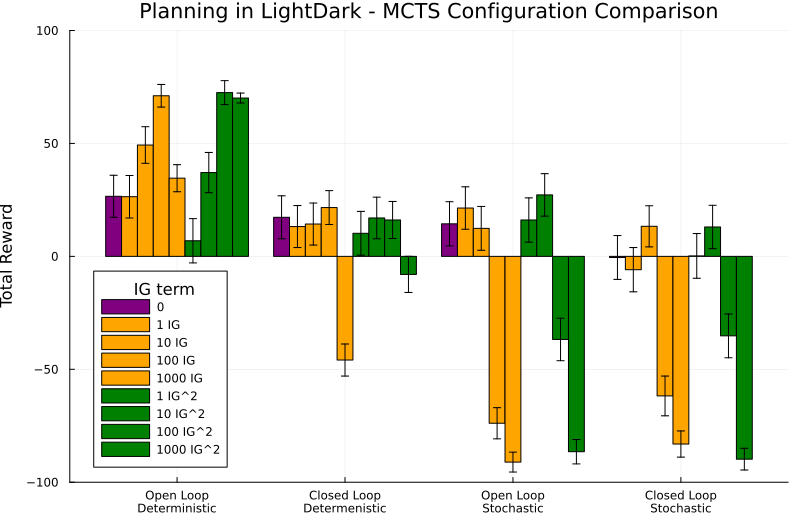

In [8]:
names = ["Open Loop\nDeterministic", "Closed Loop\nDetermenistic", "Open Loop\nStochastic", "Closed Loop\nStochastic"]
params = ["0", "1 IG", "10 IG", "100 IG", "1000 IG", "1 IG^2", "10 IG^2", "100 IG^2", "1000 IG^2"]
names, LD, params = prepare_groupedbar_inputs!(names, LD, params)
groupedbar( names,
            LD, 
            yerr=LD_err,
            title="Planning in LightDark - MCTS Configuration Comparison",
            ylabel="Total Reward",
            ylim=(-100, 100),
            legendtitle = "IG term",
            bar_width=0.85, 
            groups=params,
            #legend=:outertopright,
            legend=:bottomleft,
            size=(800,520),
            c=[:purple :orange :orange :orange :orange :green :green :green :green])

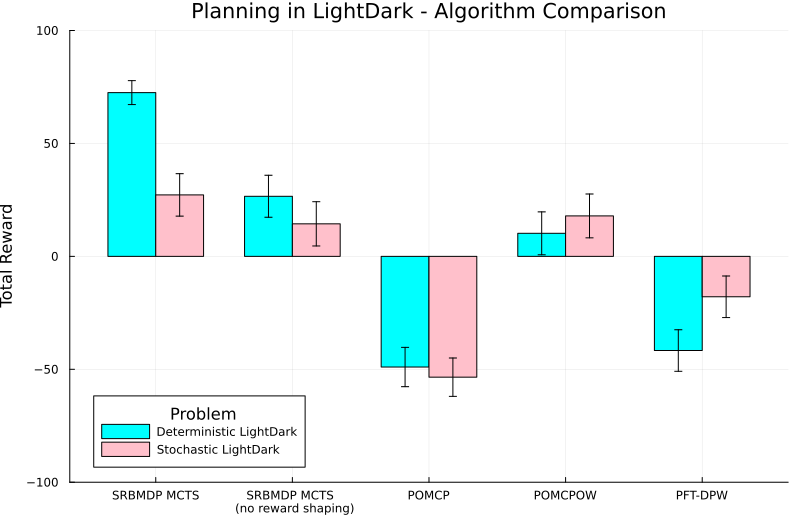

In [9]:
names = ["SRBMDP MCTS", "SRBMDP MCTS \n (no reward shaping)", "POMCP", "POMCPOW", "PFT-DPW"]
params = ["Deterministic LightDark", "Stochastic LightDark"]
names, LD_comp, params = prepare_groupedbar_inputs!(names, LD_comp, params)
groupedbar( names,
            LD_comp, 
            yerr=LD_comp_err,
            title="Planning in LightDark - Algorithm Comparison",
            ylabel="Total Reward",
            ylim=(-100, 100),
            legendtitle = "Problem",
            bar_width=0.7, 
            groups=params,
            legend=:bottomleft,
            size=(800,520),
            c=[:cyan :pink])

In [10]:
RS = [   15.5  15.6 17.2 32.0  24.3    16.0 15.6  29.2  36.6
         15.0  13.8 17.2 24.6  17.9    -3.9  4.2 -27.0  24.4
        -7.9 -7.8   19.3  -28.7 -45.0 -13.0 12.9 -8.2 -16.8
        -9.0 -3.7    9.6 -27.3 -51.8  -6.6 -10.4 -4.3 -19.3];

RS_err = [  9.6 0.2 0.8 4.0 3.6 0.2 0.2 3.8 3.9
            9.7 0.7 0.8 2.4 2.8 9.7 9.7 9.9 3.4
            3.3 3.4 4.6 4.3 4.2 4.1 4.0 4.6 3.9
            3.9 3.3 4.4 4.4 4.4 3.6 3.8 4.5 3.9];

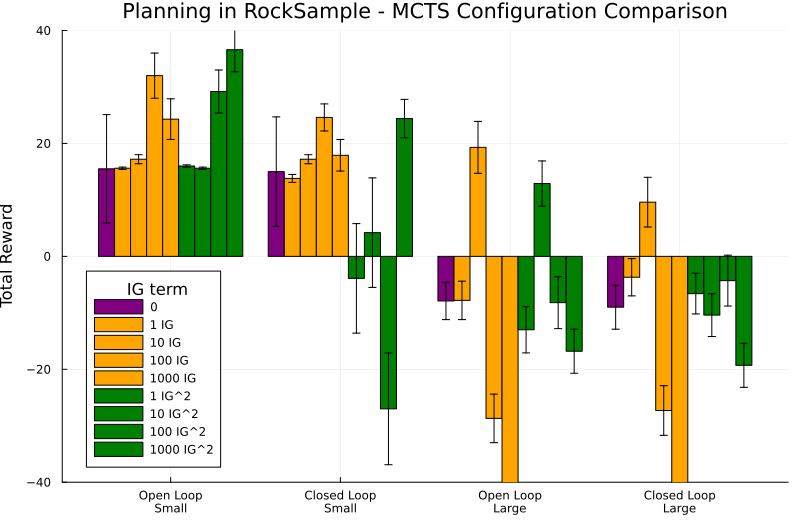

In [11]:
names = ["Open Loop\nSmall", "Closed Loop\nSmall", "Open Loop\nLarge", "Closed Loop\nLarge"]
params = ["0", "1 IG", "10 IG", "100 IG", "1000 IG", "1 IG^2", "10 IG^2", "100 IG^2", "1000 IG^2"]
names, RS, params = prepare_groupedbar_inputs!(names, RS, params)
groupedbar( names,
            RS, 
            yerr=RS_err,
            title="Planning in RockSample - MCTS Configuration Comparison",
            ylabel="Total Reward",
            ylim=(-40, 40),
            legendtitle = "IG term",
            bar_width=0.85, 
            groups=params,
            #legend=:outertopright,
            legend=:bottomleft,
            size=(800,520),
            c=[:purple :orange :orange :orange :orange :green :green :green :green])

In [26]:
RS_comp = [ 32.0  28.3
            15.5  1.1
            10.2  0.5
            17.0  15.0
            12.5 -2.4]

RS_comp_err = [ 4.0 1.9
                9.6 1.6
                1.1 1.6
                1.3 1.9
                1.3 1.9];

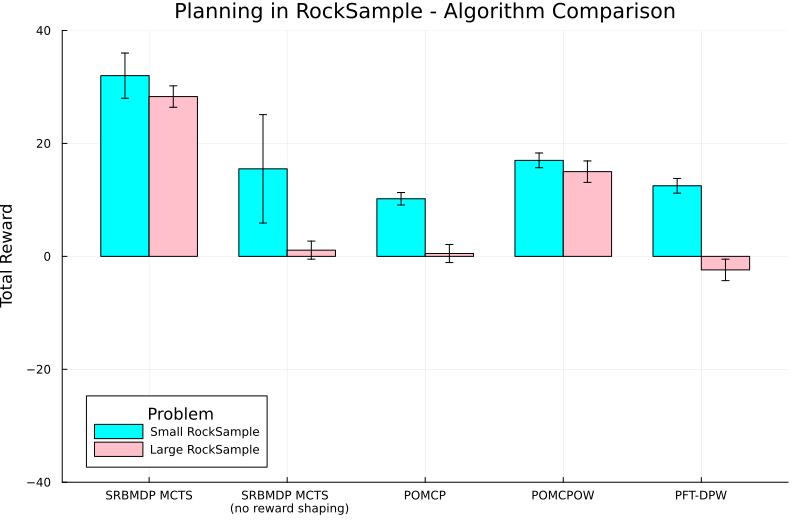

In [27]:
names = ["SRBMDP MCTS", "SRBMDP MCTS \n (no reward shaping)", "POMCP", "POMCPOW", "PFT-DPW"]
params = ["Small RockSample", "Large RockSample"]
names, RS_comp, params = prepare_groupedbar_inputs!(names, RS_comp, params)
groupedbar( names,
            RS_comp, 
            yerr=RS_comp_err,
            title="Planning in RockSample - Algorithm Comparison",
            ylabel="Total Reward",
            ylim=(-40, 40),
            legendtitle = "Problem",
            bar_width=0.7, 
            groups=params,
            legend=:bottomleft,
            size=(800,520),
            c=[:cyan :pink])

In [ ]:
### LEARNING

In [18]:
LD =   [-47.1 56.2 59.2 -100.0 -100.0   64.1   66.3 66.3   -100.0
        -83.9 46.7  1.4  -10.0 -100.0   33.2 -100.0 -100.0 -100.0
         33.7  1.1 55.1   12.6 -100.0 -100.0    2.4   26.9  -89.3
         42.8 56.5 60.7 -100.0 -100.0   53.1 -100.0 -100.0  -83.5]

LD_err =   [2.8 2.1 2.1 0.0 0.0 2.1 2.0 2.0 0.0
            1.7 2.6 3.1 0.0 0.0 2.8 0.0 0.0 0.0
            2.8 3.1 2.4 3.0 0.0 0.0 3.1 2.8 1.5
            2.5 2.3 2.2 0.0 0.0 2.4 0.0 0.0 1.8];

LD_comp = [  66.3 60.7
            -47.1  42.8
            -87.8 -100.0];

LD_comp_err =  [2.0 2.2
                2.8 2.5
                1.7 0.0];

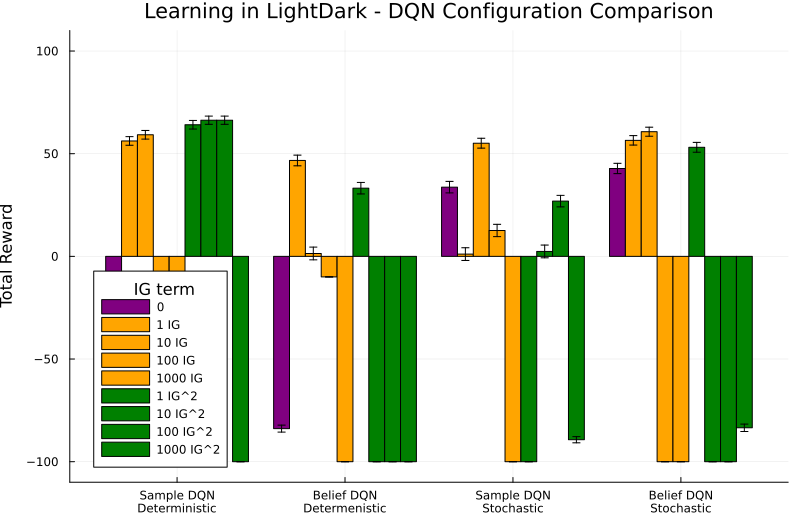

In [19]:
names = ["Sample DQN\nDeterministic", "Belief DQN\nDetermenistic", "Sample DQN\nStochastic", "Belief DQN\nStochastic"]
params = ["0", "1 IG", "10 IG", "100 IG", "1000 IG", "1 IG^2", "10 IG^2", "100 IG^2", "1000 IG^2"]
names, LD, params = prepare_groupedbar_inputs!(names, LD, params)
groupedbar( names,
            LD, 
            yerr=LD_err,
            title="Learning in LightDark - DQN Configuration Comparison",
            ylabel="Total Reward",
            ylim=(-110, 110),
            legendtitle = "IG term",
            bar_width=0.85, 
            groups=params,
            #legend=:outertopright,
            legend=:bottomleft,
            size=(800,520),
            c=[:purple :orange :orange :orange :orange :green :green :green :green])

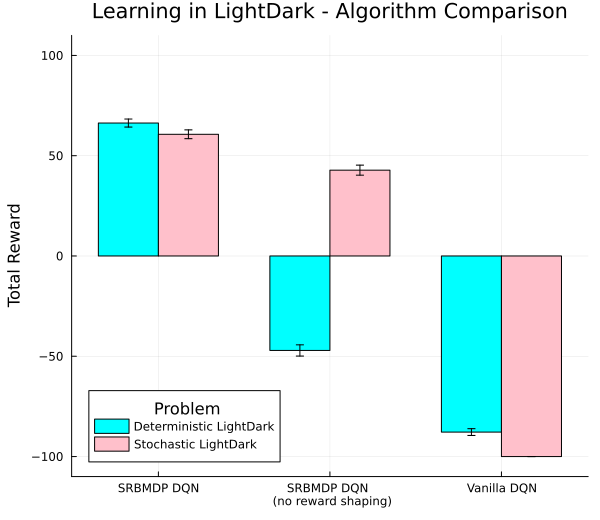

In [22]:
names = ["SRBMDP DQN", "SRBMDP DQN \n (no reward shaping)", "Vanilla DQN"]
params = ["Deterministic LightDark", "Stochastic LightDark"]
names, LD_comp, params = prepare_groupedbar_inputs!(names, LD_comp, params)
groupedbar( names,
            LD_comp, 
            yerr=LD_comp_err,
            title="Learning in LightDark - Algorithm Comparison",
            ylabel="Total Reward",
            ylim=(-110, 110),
            legendtitle = "Problem",
            bar_width=0.7, 
            groups=params,
            legend=:bottomleft,
            size=(600,520),
            c=[:cyan :pink])

In [23]:
RS = [   4.7 43.1 44.0  41.7  5.4 17.0 20.5 37.1 -61.4
        17.0 36.0 42.2 -19.8  34.4 44.4 23.2 45.6  42.9
        39.1 32.8 37.3  20.7 -21.7 32.5 32.1 42.5  57.3
        31.8 41.4 39.4  45.0 -17.0 42.4 39.7 51.3 53.5];

RS_err = [  1.8 1.2 1.2 1.5 2.4 0.0 1.6 1.5 1.7
            0.0 0.4 0.2 1.3 1.1 0.1 0.2 0.2 0.2
            1.3 1.6 1.6 3.1 3.0 1.6 1.8 1.5 1.3
            1.3 0.2 0.3 0.1 0.1 0.2 0.2 0.1 0.1];

RS_comp = [  45.6 59.6
             17.0 39.1
             17.0 15.0];

RS_comp_err =  [0.2 0.0
                0.0 0.1
                0.0 0.0];

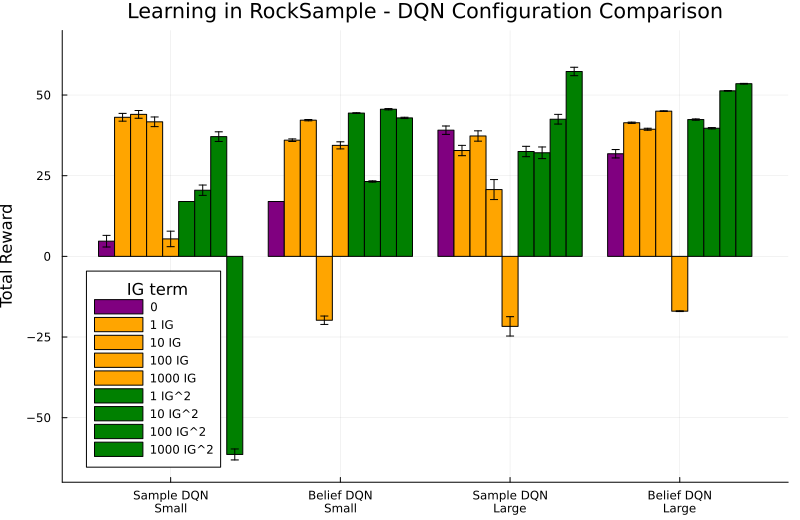

In [24]:
names = ["Sample DQN\nSmall", "Belief DQN\nSmall", "Sample DQN\nLarge", "Belief DQN\nLarge"]
params = ["0", "1 IG", "10 IG", "100 IG", "1000 IG", "1 IG^2", "10 IG^2", "100 IG^2", "1000 IG^2"]
names, RS, params = prepare_groupedbar_inputs!(names, RS, params)
groupedbar( names,
            RS, 
            yerr=RS_err,
            title="Learning in RockSample - DQN Configuration Comparison",
            ylabel="Total Reward",
            ylim=(-70, 70),
            legendtitle = "IG term",
            bar_width=0.85, 
            groups=params,
            #legend=:outertopright,
            legend=:bottomleft,
            size=(800,520),
            c=[:purple :orange :orange :orange :orange :green :green :green :green])

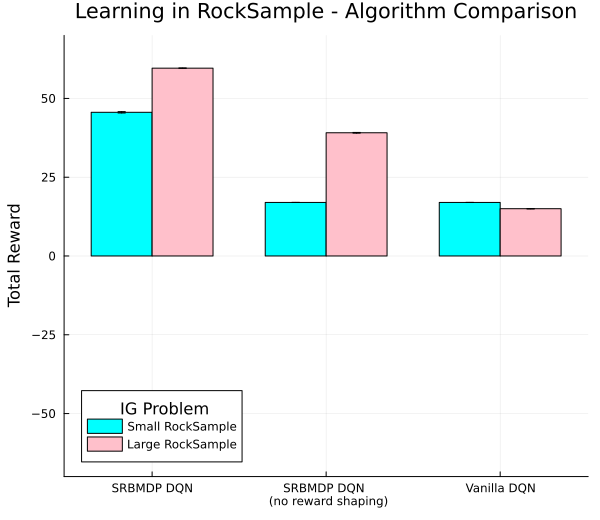

In [25]:
names = ["SRBMDP DQN", "SRBMDP DQN \n (no reward shaping)", "Vanilla DQN"]
params = ["Small RockSample", "Large RockSample"]
names, RS_comp, params = prepare_groupedbar_inputs!(names, RS_comp, params)
groupedbar( names,
            RS_comp, 
            yerr=RS_comp_err,
            title="Learning in RockSample - Algorithm Comparison",
            ylabel="Total Reward",
            ylim=(-70, 70),
            legendtitle = "IG Problem",
            bar_width=0.7, 
            groups=params,
            legend=:bottomleft,
            size=(600,520),
            c=[:cyan :pink])